In [2]:
from functools import partial
from natsort import natsorted
from functools import partial
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from scipy.stats import spearmanr, pearsonr
import glob
from Bio import SeqIO

In [3]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', None)

In [4]:
bwa_exe = './bwa'
samtools_exe = './samtools'

In [5]:
ngs_dir_name = 'WT1_NGS'
csv_name = 'WT1_order_seqs.csv'

path_to_fastq_qz_files = ngs_dir_name + '/0_paired_reads/'

original_df = pd.read_csv(ngs_dir_name +  '/' + csv_name)
path_to_output_fasta_dna_seqs_no_adapter = ngs_dir_name + '/' + ngs_dir_name + '_seqs_no_adapter.fasta'

In [6]:
original_df

,Unnamed: 0,binder_rt,binder_seq,pdb_description,binder,description,chip_dna
0,0,GATGAATTGGATGAAGCTAGAAAAAGAGCTCAAAAGGCTGTTGATGAAGCACATAAAACTGGTACTGAATTGGCTGCTTTGCGGGCTCAATTGGCTTTGAATGAAGAAATGGCTTTGTGGTTGAGAGAATTGGCTAAGAGAGCCGAAAAGAATGGTGATGAAGAATCCGCAGAAGAATTTAGAAGAGAAGCAGAATTGGTTCAAAGATTGGCTGAAAGAGTTAGAGAACTGGTTGAAGAAGATGAAAAG,DELDEARKRAQKAVDEAHKTGTELAALRAQLALNEEMALWLRELAKRAEKNGDEESAEEFRREAELVQRLAERVRELVEEDEK,shortscaf53_2x4o_model0_iscafv1_33_dldesign_2_dldesign_0_31_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_iscafv2_8_dldesign_0_8_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1,DELDEARKRAQKAVDEAHKTGTELAALRAQLALNEEMALWLRELAKRAEKNGDEESAEEFRREAELVQRLAERVRELVEEDEK,shortscaf53_2x4o_model0_iscafv1_33_dldesign_2_dldesign_0_31_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_iscafv2_8_dldesign_0_8_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1,GGGTCGGCTTCGCATATGGGCAGCGATGAATTGGATGAAGCTAGAAAAAGAGCTCAAAAGGCTGTTGATGAAGCACATAAAACTGGTACTGAATTGGCTGCTTTGCGGGCTCAATTGGCTTTGAATGAAGAAATGGCTTTGTGGTTGAGAGAATTGGCTAAGAGAGCCGAAAAGAATGGTGATGAAGAATCCGCAGAAGAATTTAGAAGAGAAGCAGAATTGGTTCAAAGATTGGCTGAAAGAGTTAGAGAACTGGTTGAAGAAGATGAAAAGGGCAGCGGTCTCGAGGGTGGAGGTTCC
1,1,TCGCCCGAAAGAGAAGAATTGTTGTTGTCCGCTAGAACTCAAATTGCTACCGTTGAAGTCTTGTTGGATTCCGAAGATAGAGGTGAAATTCCACCCTTGTCCAAAGAAGAATACGAAGCTCTGTTGGAAGCCACTAGATTGTACAGAGATTACTACGTTCAAGAAGCCAGGAGATTGGGTGTTGATGAAGAAACTATTAGAAAATTGGAAGAAGAGTTTGATAAGGTGATTAAAAGAGTTGAAAAGAGGAGAGAAGAAGCT,SPEREELLLSARTQIATVEVLLDSEDRGEIPPLSKEEYEALLEATRLYRDYYVQEARRLGVDEETIRKLEEEFDKVIKRVEKRREEA,shortscaf23_aligned_AF36rsyiscafv1_4_dl_0_22_af2_iscafv2_6_dl_0_27_af2_A0201_RMFPNAPYL_unrelaxed_model_1_iscafv3_5_dl_0_22_af2_iscafv4_30_dl_0_13_af2_A0201_RMFPNAPYL_unrelaxed_model_1_iscafv5_24_dl_0_5_af2_A0201_RMFPNAPYL_unrelaxed_model_1,SPEREELLLSARTQIATVEVLLDSEDRGEIPPLSKEEYEALLEATRLYRDYYVQEARRLGVDEETIRKLEEEFDKVIKRVEKRREEA,shortscaf23_aligned_AF36rsyiscafv1_4_dl_0_22_af2_iscafv2_6_dl_0_27_af2_A0201_RMFPNAPYL_unrelaxed_model_1_iscafv3_5_dl_0_22_af2_iscafv4_30_dl_0_13_af2_A0201_RMFPNAPYL_unrelaxed_model_1_iscafv5_24_dl_0_5_af2_A0201_RMFPNAPYL_unrelaxed_model_1,GGGTCGGCTTCGCATATGTCGCCCGAAAGAGAAGAATTGTTGTTGTCCGCTAGAACTCAAATTGCTACCGTTGAAGTCTTGTTGGATTCCGAAGATAGAGGTGAAATTCCACCCTTGTCCAAAGAAGAATACGAAGCTCTGTTGGAAGCCACTAGATTGTACAGAGATTACTACGTTCAAGAAGCCAGGAGATTGGGTGTTGATGAAGAAACTATTAGAAAATTGGAAGAAGAGTTTGATAAGGTGATTAAAAGAGTTGAAAAGAGGAGAGAAGAAGCTGGACTCGAGGGTGGAGGTTCC
2,2,ATGACTCCAGAACAAAGACGGCAAATGTACGAAGTTTCCGTTCGCGTTTTGAGAGAAACTGCTGATGATGAAACCGTTAGAGAAGTTTTGGAACTGTTGCGCGAAGCTGCTAAGGCTGAAGGTAATGAAGAAGAAGCTAAGTTTTTGGATGAACAAATTAAAGAAGTT,MTPEQRRQMYEVSVRVLRETADDETVREVLELLREAAKAEGNEEEAKFLDEQIKEV,shortscaf81_2x4o_model0_iscafv1_97_dldesign_0_dldesign_0_5_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_iscafv2_2_dldesign_0_2_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1,MTPEQRRQMYEVSVRVLRETADDETVREVLELLREAAKAEGNEEEAKFLDEQIKEV,shortscaf81_2x4o_model0_iscafv1_97_dldesign_0_dldesign_0_5_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_iscafv2_2_dldesign_0_2_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1,GGGTCGGCTTCGCATATGGGCTCGGGTTCGGGGTCTGGGTCCGGCAGTGGGAGCGGGTCGGGATCGATGACTCCAGAACAAAGACGGCAAATGTACGAAGTTTCCGTTCGCGTTTTGAGAGAAACTGCTGATGATGAAACCGTTAGAGAAGTTTTGGAACTGTTGCGCGAAGCTGCTAAGGCTGAAGGTAATGAAGAAGAAGCTAAGTTTTTGGATGAACAAATTAAAGAAGTTGGTAGCGGATCGGGTTCTGGCTCTGGATCGGGGTCAGGATCGGGTAGTCTCGAGGGTGGAGGTTCC
3,3,TCCATGTTGCAAACCCTAGTTGAAGCCTACAGATTGATGGTTGAAGCCCTGGAATTGGACCCAGATCTGACTCCAGAACAAAAACAAAAGATTTTGGATACCTCCGAAAAAGTGTTTAGACAAACCGTTAAAGAACAAGGTTTGGATGAAGAAGAATTTGAAAAGGCCGTCGAAAAGATTAGATCC,SMLQTLVEAYRLMVEALELDPDLTPEQKQKILDTSEKVFRQTVKEQGLDEEEFEKAVEKIRS,shortscaf31_2x4o_model3_iscafv1_54_dldesign_3_dldesign_0_11_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_iscafv2_14_dldesign_0_8_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1,SMLQTLVEAYRLMVEALELDPDLTPEQKQKILDTSEKVFRQTVKEQGLDEEEFEKAVEKIRS,shortscaf31_2x4o_model3_iscafv1_54_dldesign_3_dldesign_0_11_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_iscafv2_14_dldesign_0_8_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1,GGGTCGGCTTCGCATATGGGTAGCGGCTCTGGCTCAGGCTCAGGCAGCGGGTCTGGGTCCATGTTGCAAA

# First generate some fasta files

In [7]:
fasta_str = '\n'.join([f'>{desc}\n{seq}' for _, (desc, seq) in original_df[['description', 'binder_rt']].iterrows()])

outfn = path_to_output_fasta_dna_seqs_no_adapter
with open(outfn, 'w') as outfn:
    outfn.write(fasta_str)


# Second get count files

In [8]:
print(f'./bwa index {path_to_output_fasta_dna_seqs_no_adapter}')

./bwa index WT1_NGS/WT1_NGS_seqs_no_adapter.fasta


In [9]:
fastqgz_paths = list(Path(path_to_fastq_qz_files).glob('*R1*.fastq.gz'))

In [10]:
cmd_list = []
for path in fastqgz_paths:
    r1 = path
    r2 = path.__str__().replace('R1','R2')
    outfn = '_'.join(r1.__str__().split('_')[0:6]) + '.bam'
    cmd = (
        f'{bwa_exe} '
        'mem -t 10 '
        f'{path_to_output_fasta_dna_seqs_no_adapter} '
        f'<(zcat {r1}) <(zcat {r2}) '
        f'| {samtools_exe} sort -@5 > '
        f'{outfn}')
    cmd_list.append(cmd)

In [11]:
Path(path_to_fastq_qz_files + '/task_bwa').write_text('\n'.join(cmd_list))
print(len(cmd_list))
# Then submit sub_task_bwa.sh

20


In [12]:
cmds = []
for fn in Path(path_to_fastq_qz_files).glob('*.bam'):
    print(fn)
    cmd = "/home/wchen108/tools/samtools/bin/samtools view -F 4 " + str(fn) + " |  awk '{print $3}' | sort -k1 | uniq -c | sort -k1nr > " + str(fn)[:-4] + ".counts"
    cmds.append(cmd)

WT1_NGS/0_paired_reads/688968_S13_L001_R1.bam
WT1_NGS/0_paired_reads/688960_S5_L001_R1.bam
WT1_NGS/0_paired_reads/688961_S6_L001_R1.bam
WT1_NGS/0_paired_reads/688966_S11_L001_R1.bam
WT1_NGS/0_paired_reads/688971_S16_L001_R1.bam
WT1_NGS/0_paired_reads/688964_S9_L001_R1.bam
WT1_NGS/0_paired_reads/688962_S7_L001_R1.bam
WT1_NGS/0_paired_reads/688969_S14_L001_R1.bam
WT1_NGS/0_paired_reads/688970_S15_L001_R1.bam
WT1_NGS/0_paired_reads/688963_S8_L001_R1.bam
WT1_NGS/0_paired_reads/688965_S10_L001_R1.bam
WT1_NGS/0_paired_reads/688975_S20_L001_R1.bam
WT1_NGS/0_paired_reads/688959_S4_L001_R1.bam
WT1_NGS/0_paired_reads/688957_S2_L001_R1.bam
WT1_NGS/0_paired_reads/688973_S18_L001_R1.bam
WT1_NGS/0_paired_reads/688974_S19_L001_R1.bam
WT1_NGS/0_paired_reads/688956_S1_L001_R1.bam
WT1_NGS/0_paired_reads/688958_S3_L001_R1.bam
WT1_NGS/0_paired_reads/688972_S17_L001_R1.bam
WT1_NGS/0_paired_reads/688967_S12_L001_R1.bam


In [13]:
Path(path_to_fastq_qz_files + '/task_counts').write_text('\n'.join(cmds))
print(len(cmds))
# Then submit sub_task_bwa.sh

20


# Third, analyze the NGS data

In [14]:
count_paths = natsorted(list(Path(path_to_fastq_qz_files).glob('*.counts')))
count_paths = [path for path in count_paths if path.stat().st_size > 0]

In [15]:
def readfile(path):
    return pd.read_csv(path, delimiter=r'\s+', header=None).assign(source=path.stem.split('.fastq')[0])

count_df = pd.concat(list(map(readfile, count_paths))).rename(columns={0: 'counts', 1: 'name'})

In [16]:
count_df

,counts,name,source
0,18669,shortscaf20_2x4o_model3_iscafv1_88_dldesign_1_dldesign_0_16_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,688956_S1_L001_R1
1,5138,shortscaf35_2x4o_model3_iscafv1_25_dldesign_2_dldesign_0_24_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_iscafv2_11_dldesign_0_2_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,688956_S1_L001_R1
2,4608,shortscaf18_2x4o_model3_iscafv1_58_dldesign_0_dldesign_0_25_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,688956_S1_L001_R1
3,3895,shortscaf12_aligned_6rsyiscafv1_48_dldesign_0_6_af2pred_dna_seq1,688956_S1_L001_R1
4,3885,shortscaf65_2x4o_model0_iscafv1_65_dldesign_1_dldesign_0_31_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_iscafv2_5_dldesign_0_12_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,688956_S1_L001_R1
...,...,...,...
9075,1,shortscaf98_2x4o_model3_iscafv1_27_dldesign_1_dldesign_0_3_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,688975_S20_L001_R1
9076,1,shortscaf99_2x4o_model3_iscafv1_33_dldesign_3_dldesign_0_19_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,688975_S20_L001_R1
9077,1,shortscaf99_2x4o_model3_iscafv1_36_dldesign_2_dldesign_0_17_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,688975_S20_L001_R1
9078,1,shortscaf99_aligned_AF36rsyiscafv1_54_dldesign_0_10_af2pred_dna_seq1,688975_S20_L001_R1


In [17]:
# Group rows by the source and by the name without the dna signifier,
# then sum those values and make a new dataframe
count_df = count_df.groupby(['source', 'name'])['counts'].sum().reset_index()

In [18]:
count_df = count_df.rename(columns={'counts': 'sum_counts'})

In [19]:
count_df.sort_values(by='sum_counts', ascending=False)

,source,name,sum_counts
126330,688968_S13_L001_R1,shortscaf20_2x4o_model3_iscafv1_88_dldesign_1_dldesign_0_16_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,602339
137928,688969_S14_L001_R1,shortscaf20_2x4o_model3_iscafv1_88_dldesign_1_dldesign_0_16_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,506048
160776,688971_S16_L001_R1,shortscaf20_2x4o_model3_iscafv1_88_dldesign_1_dldesign_0_16_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,495211
149397,688970_S15_L001_R1,shortscaf20_2x4o_model3_iscafv1_88_dldesign_1_dldesign_0_16_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,467707
108998,688966_S11_L001_R1,shortscaf20_2x4o_model3_iscafv1_88_dldesign_1_dldesign_0_16_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,445582
...,...,...,...
82845,688963_S8_L001_R1,shortscaf22_aligned_AF36rsyiscafv1_14_dldesign_0_14_af2pred_dna_seq1,1
101547,688965_S10_L001_R1,shortscaf22_aligned_AF36rsyiscafv1_93_dldesign_0_29_af2pred_iscafv2_3_dldesign_0_16_af2pred_A0201_RMFPNAPYL_unrelaxed_model_1_iscafv3_9_dldesign_0_31_af2pred_dna_seq1,1
186829,688973_S18_L001_R1,shortscaf31_2x4o_model0_iscafv1_35_dldesign_2_dldesign_0_14_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,1
207586,688975_S20_L001_R1,shortscaf49_2x4o_model0_iscafv1_20_dldesign_2_dldesign_0_10_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_iscafv2_7_dldesign_0_15_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,1


In [20]:
count_df.insert(1, 'normalized_counts', (
        count_df['sum_counts'] - count_df.groupby('source')['sum_counts'].transform('mean')
    ) / count_df.groupby('source')['sum_counts'].transform('std')
)

In [21]:
count_df.insert(2, 'relative_frequency', (
        count_df['sum_counts'] / count_df.groupby('source')['sum_counts'].transform('sum')
    )
)

In [22]:
count_df

,source,normalized_counts,relative_frequency,name,sum_counts
0,688956_S1_L001_R1,-0.612918,0.000049,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_14_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,284
1,688956_S1_L001_R1,-0.249661,0.000070,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_25_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,406
2,688956_S1_L001_R1,-0.502750,0.000056,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_27_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,321
3,688956_S1_L001_R1,-0.469997,0.000057,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_5_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,332
4,688956_S1_L001_R1,-0.803480,0.000038,bxscaf2_2x4o_model0_iscafv1_10_dldesign_2_dldesign_0_10_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,220
...,...,...,...,...,...
210254,688975_S20_L001_R1,-0.063340,0.000008,shortscaf9_2x4o_model3_iscafv1_78_dldesign_1_dldesign_0_12_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,6
210255,688975_S20_L001_R1,-0.067324,0.000001,shortscaf9_2x4o_model3_iscafv1_78_dldesign_2_dldesign_0_10_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,1
210256,688975_S20_L001_R1,-0.066527,0.000003,shortscaf9_aligned_AF36rsyiscafv1_76_dldesign_0_20_af2pred_dna_seq1,2
210257,688975_S20_L001_R1,-0.066527,0.000003,shortscaf9_aligned_AF36rsyiscafv1_76_dldesign_0_7_af2pred_dna_seq1,2


In [23]:
order = ['name', 'sum_counts', 'normalized_counts', 'relative_frequency', 'source']
count_df = count_df[order]

In [24]:
count_df

,name,sum_counts,normalized_counts,relative_frequency,source
0,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_14_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,284,-0.612918,0.000049,688956_S1_L001_R1
1,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_25_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,406,-0.249661,0.000070,688956_S1_L001_R1
2,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_27_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,321,-0.502750,0.000056,688956_S1_L001_R1
3,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_5_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,332,-0.469997,0.000057,688956_S1_L001_R1
4,bxscaf2_2x4o_model0_iscafv1_10_dldesign_2_dldesign_0_10_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,220,-0.803480,0.000038,688956_S1_L001_R1
...,...,...,...,...,...
210254,shortscaf9_2x4o_model3_iscafv1_78_dldesign_1_dldesign_0_12_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,6,-0.063340,0.000008,688975_S20_L001_R1
210255,shortscaf9_2x4o_model3_iscafv1_78_dldesign_2_dldesign_0_10_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,1,-0.067324,0.000001,688975_S20_L001_R1
210256,shortscaf9_aligned_AF36rsyiscafv1_76_dldesign_0_20_af2pred_dna_seq1,2,-0.066527,0.000003,688975_S20_L001_R1
210257,shortscaf9_aligned_AF36rsyiscafv1_76_dldesign_0_7_af2pred_dna_seq1,2,-0.066527,0.000003,688975_S20_L001_R1


In [25]:
# Assuming df is your DataFrame
grouped_refined = count_df.groupby('source')

# Create a dictionary of DataFrames split by 'source' values
split_dataframes_refined = {name: group.copy() for name, group in grouped_refined}

# Iterate through the split dataframes and modify columns
for name, group_df in split_dataframes_refined.items():

    group_df.rename(columns={
        'sum_counts': f'sum_counts_{name}',
        'normalized_counts': f'normalized_counts_{name}',
        'relative_frequency': f'relative_frequency_{name}',
        'source': f'source_{name}'
    }, inplace=True)

    # Update the DataFrame within the dictionary
    split_dataframes_refined[name] = group_df

In [28]:
# Assuming split_dataframes is the dictionary of modified DataFrames
dfs_to_merge = list(split_dataframes_refined.values())

# Merge all DataFrames based on the 'description' column
merged_df_refined = pd.merge(dfs_to_merge[0], dfs_to_merge[1], on='name', how='outer')
for df in dfs_to_merge[2:]:
    merged_df_refined = pd.merge(merged_df_refined, df, on='name', how='outer')


In [29]:
WT1_NGS_mapping = {
    'expression_sort': {'relative_frequency_688957_S2_L001_R1': 'relative_frequency_688956_S1_L001_R1'},
    '1st_sort': {
        'relative_frequency_688960_S5_L001_R1': 'relative_frequency_688957_S2_L001_R1',
        'relative_frequency_688961_S6_L001_R1': 'relative_frequency_688957_S2_L001_R1',
        'relative_frequency_688966_S11_L001_R1': 'relative_frequency_688957_S2_L001_R1',
        'relative_frequency_688967_S12_L001_R1': 'relative_frequency_688957_S2_L001_R1'
                }
}


all_mappings = {
    'WT1_NGS': WT1_NGS_mapping
}

In [30]:
columns_to_drop = [col for col in merged_df_refined.columns if 'sum_counts' in col or 'normalized' in col]
temp = merged_df_refined.drop(columns=columns_to_drop)


In [31]:
for design in merged_df_refined.index:

    for sort_type, sorts in all_mappings[ngs_dir_name].items():

        for child_sort, parent_sort in sorts.items():
            # Compute enrichment value
            enrichment_value = merged_df_refined.at[design, child_sort] / merged_df_refined.at[design, parent_sort]
            # Add enrichment value as a new column
            column_name = f'{child_sort}_enrichment'
            merged_df_refined.at[design, column_name] = enrichment_value

In [32]:
merged_df_refined

,name,sum_counts_688956_S1_L001_R1,normalized_counts_688956_S1_L001_R1,relative_frequency_688956_S1_L001_R1,source_688956_S1_L001_R1,sum_counts_688957_S2_L001_R1,normalized_counts_688957_S2_L001_R1,relative_frequency_688957_S2_L001_R1,source_688957_S2_L001_R1,sum_counts_688958_S3_L001_R1,normalized_counts_688958_S3_L001_R1,relative_frequency_688958_S3_L001_R1,source_688958_S3_L001_R1,sum_counts_688959_S4_L001_R1,normalized_counts_688959_S4_L001_R1,relative_frequency_688959_S4_L001_R1,source_688959_S4_L001_R1,sum_counts_688960_S5_L001_R1,normalized_counts_688960_S5_L001_R1,relative_frequency_688960_S5_L001_R1,source_688960_S5_L001_R1,sum_counts_688961_S6_L001_R1,normalized_counts_688961_S6_L001_R1,relative_frequency_688961_S6_L001_R1,source_688961_S6_L001_R1,sum_counts_688962_S7_L001_R1,normalized_counts_688962_S7_L001_R1,relative_frequency_688962_S7_L001_R1,source_688962_S7_L001_R1,sum_counts_688963_S8_L001_R1,normalized_counts_688963_S8_L001_R1,relative_frequency_688963_S8_L001_R1,source_688963_S8_L001_R1,sum_counts_688964_S9_L001_R1,normalized_counts_688964_S9_L001_R1,relative_frequency_688964_S9_L001_R1,source_688964_S9_L001_R1,sum_counts_688965_S10_L001_R1,normalized_counts_688965_S10_L001_R1,relative_frequency_688965_S10_L001_R1,source_688965_S10_L001_R1,sum_counts_688966_S11_L001_R1,normalized_counts_688966_S11_L001_R1,relative_frequency_688966_S11_L001_R1,source_688966_S11_L001_R1,sum_counts_688967_S12_L001_R1,normalized_counts_688967_S12_L001_R1,relative_frequency_688967_S12_L001_R1,source_688967_S12_L001_R1,sum_counts_688968_S13_L001_R1,normalized_counts_688968_S13_L001_R1,relative_frequency_688968_S13_L001_R1,source_688968_S13_L001_R1,sum_counts_688969_S14_L001_R1,normalized_counts_688969_S14_L001_R1,relative_frequency_688969_S14_L001_R1,source_688969_S14_L001_R1,sum_counts_688970_S15_L001_R1,normalized_counts_688970_S15_L001_R1,relative_frequency_688970_S15_L001_R1,source_688970_S15_L001_R1,sum_counts_688971_S16_L001_R1,normalized_counts_688971_S16_L001_R1,relative_frequency_688971_S16_L001_R1,source_688971_S16_L001_R1,sum_counts_688972_S17_L001_R1,normalized_counts_688972_S17_L001_R1,relative_frequency_688972_S17_L001_R1,source_688972_S17_L001_R1,sum_counts_688973_S18_L001_R1,normalized_counts_688973_S18_L001_R1,relative_frequency_688973_S18_L001_R1,source_688973_S18_L001_R1,sum_counts_688974_S19_L001_R1,normalized_counts_688974_S19_L001_R1,relative_frequency_688974_S19_L001_R1,source_688974_S19_L001_R1,sum_counts_688975_S20_L001_R1,normalized_counts_688975_S20_L001_R1,relative_frequency_688975_S20_L001_R1,source_688975_S20_L001_R1,relative_frequency_688957_S2_L001_R1_enrichment,relative_frequency_688960_S5_L001_R1_enrichment,relative_frequency_688961_S6_L001_R1_enrichment,relative_frequency_688966_S11_L001_R1_enrichment,relative_frequency_688967_S12_L001_R1_enrichment
0,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_14_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,284.0,-0.612918,0.000049,688956_S1_L001_R1,81.0,-0.154555,0.000031,688957_S2_L001_R1,152.0,-0.016636,0.000074,688958_S3_L001_R1,155.0,-0.061690,5.529677e-05,688959_S4_L001_R1,103.0,0.082007,0.000132,688960_S5_L001_R1,730.0,1.051124,0.000592,688961_S6_L001_R1,270.0,0.098753,1.541781e-04,688962_S7_L001_R1,4861.0,4.772939,0.002997,688963_S8_L001_R1,166.0,-0.005384,0.000109,688964_S9_L001_R1,6117.0,4.912615,3.632790e-03,688965_S10_L001_R1,45.0,-0.039434,0.000022,688966_S11_L001_R1,21.0,-0.022414,0.000022,688967_S12_L001_R1,20.0,-0.020409,0.000013,688968_S13_L001_R1,21.0,-0.017389,0.000017,688969_S14_L001_R1,38.0,-0.017809,0.000028,688970_S15_L001_R1,63.0,-0.014045,0.000041,688971_S16_L001_R1,62.0,-0.038569,0.000045,688972_S17_L001_R1,1504.0,1.050181,0.001152,688973_S18_L001_R1,88.0,-0.018202,0.000069,688974_S19_L001_R1,108.0,0.017933,0.000139,688975_S20_L001_R1,0.625342,4.303974,19.273957,0.718899,0.700249
1,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_25_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,406.0,-0.249661,0.000070,688956_S1

In [33]:
merged_df_refined.to_csv(path_to_fastq_qz_files + '/all_counts_e.csv')

In [34]:
merged_df_refined = pd.read_csv(path_to_fastq_qz_files + '/all_counts_e.csv')

In [42]:
columns_to_drop = [col for col in merged_df_refined.columns if 'sum_counts' in col or 'normalized' in col or 'source' in col]

columns_to_drop.append('Unnamed: 0')
temp = merged_df_refined.drop(columns=columns_to_drop)

In [43]:
temp

,name,relative_frequency_688956_S1_L001_R1,relative_frequency_688957_S2_L001_R1,relative_frequency_688958_S3_L001_R1,relative_frequency_688959_S4_L001_R1,relative_frequency_688960_S5_L001_R1,relative_frequency_688961_S6_L001_R1,relative_frequency_688962_S7_L001_R1,relative_frequency_688963_S8_L001_R1,relative_frequency_688964_S9_L001_R1,relative_frequency_688965_S10_L001_R1,relative_frequency_688966_S11_L001_R1,relative_frequency_688967_S12_L001_R1,relative_frequency_688968_S13_L001_R1,relative_frequency_688969_S14_L001_R1,relative_frequency_688970_S15_L001_R1,relative_frequency_688971_S16_L001_R1,relative_frequency_688972_S17_L001_R1,relative_frequency_688973_S18_L001_R1,relative_frequency_688974_S19_L001_R1,relative_frequency_688975_S20_L001_R1,relative_frequency_688957_S2_L001_R1_enrichment,relative_frequency_688960_S5_L001_R1_enrichment,relative_frequency_688961_S6_L001_R1_enrichment,relative_frequency_688966_S11_L001_R1_enrichment,relative_frequency_688967_S12_L001_R1_enrichment
0,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_14_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,0.000049,0.000031,0.000074,5.529677e-05,0.000132,0.000592,1.541781e-04,0.002997,0.000109,3.632790e-03,0.000022,0.000022,0.000013,0.000017,0.000028,0.000041,0.000045,0.001152,0.000069,0.000139,0.625342,4.303974,19.273957,0.718899,0.700249
1,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_25_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,0.000070,0.000056,0.000121,7.242093e-05,0.000200,0.001248,1.684539e-04,0.001533,0.000064,1.425322e-03,0.000017,0.000026,0.000022,0.000033,0.000036,0.000054,0.000079,0.000071,0.000073,0.000080,0.799257,3.567635,22.224279,0.306018,0.456243
2,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_27_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,0.000056,0.000043,0.000054,4.102664e-05,0.000021,0.000011,3.426181e-06,0.000004,0.000004,2.375537e-06,0.000003,0.000004,0.000013,0.000011,0.000006,0.000021,0.000004,0.000005,0.000005,0.000004,0.778665,0.475043,0.243877,0.068106,0.094771
3,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_5_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,0.000057,0.000057,0.000073,5.351300e-05,0.000190,0.001099,1.627436e-04,0.000857,0.000067,1.686631e-03,0.000012,0.000030,0.000015,0.000027,0.000029,0.000040,0.000079,0.001835,0.000091,0.000176,0.997217,3.317434,19.190903,0.214242,0.518728
4,bxscaf2_2x4o_model0_iscafv1_10_dldesign_2_dldesign_0_10_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,0.000038,0.000033,0.000035,5.494002e-05,0.000198,0.000680,1.587464e-04,0.000730,0.000044,2.126105e-03,0.000008,0.000016,0.000016,0.000016,0.000037,0.000068,0.000089,0.003224,0.000084,0.000119,0.867056,5.991271,20.599554,0.237980,0.496728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11801,shortscaf61_2x4o_model3_iscafv1_80_dldesign_0_dldesign_0_21_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_iscafv2_13_dldesign_0_11_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,NaN,NaN,0.000003,1.427013e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11802,shortscaf46_aligned_AF36rsyiscafv1_13_dldesign_0_11_af2pred_dna_seq1,NaN,NaN,NaN,4.994547e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11803,shortscaf65_2x4o_model3_iscafv1_20_dldesign_0_dldesign_0_19_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_iscafv2_6_dldesign_0_15_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,NaN,NaN,NaN,7.135067e-07,NaN,NaN,5.710302e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11804,shortscaf46_aligned_AF36rsyiscafv1_22_dldesign_0_2_af2pred_dna_seq1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
temp.columns

Index(['name', 'relative_frequency_688956_S1_L001_R1',
       'relative_frequency_688957_S2_L001_R1',
       'relative_frequency_688958_S3_L001_R1',
       'relative_frequency_688959_S4_L001_R1',
       'relative_frequency_688960_S5_L001_R1',
       'relative_frequency_688961_S6_L001_R1',
       'relative_frequency_688962_S7_L001_R1',
       'relative_frequency_688963_S8_L001_R1',
       'relative_frequency_688964_S9_L001_R1',
       'relative_frequency_688965_S10_L001_R1',
       'relative_frequency_688966_S11_L001_R1',
       'relative_frequency_688967_S12_L001_R1',
       'relative_frequency_688968_S13_L001_R1',
       'relative_frequency_688969_S14_L001_R1',
       'relative_frequency_688970_S15_L001_R1',
       'relative_frequency_688971_S16_L001_R1',
       'relative_frequency_688972_S17_L001_R1',
       'relative_frequency_688973_S18_L001_R1',
       'relative_frequency_688974_S19_L001_R1',
       'relative_frequency_688975_S20_L001_R1',
       'relative_frequency_688957_S2_L001

In [37]:
# temp
cutoff = {}

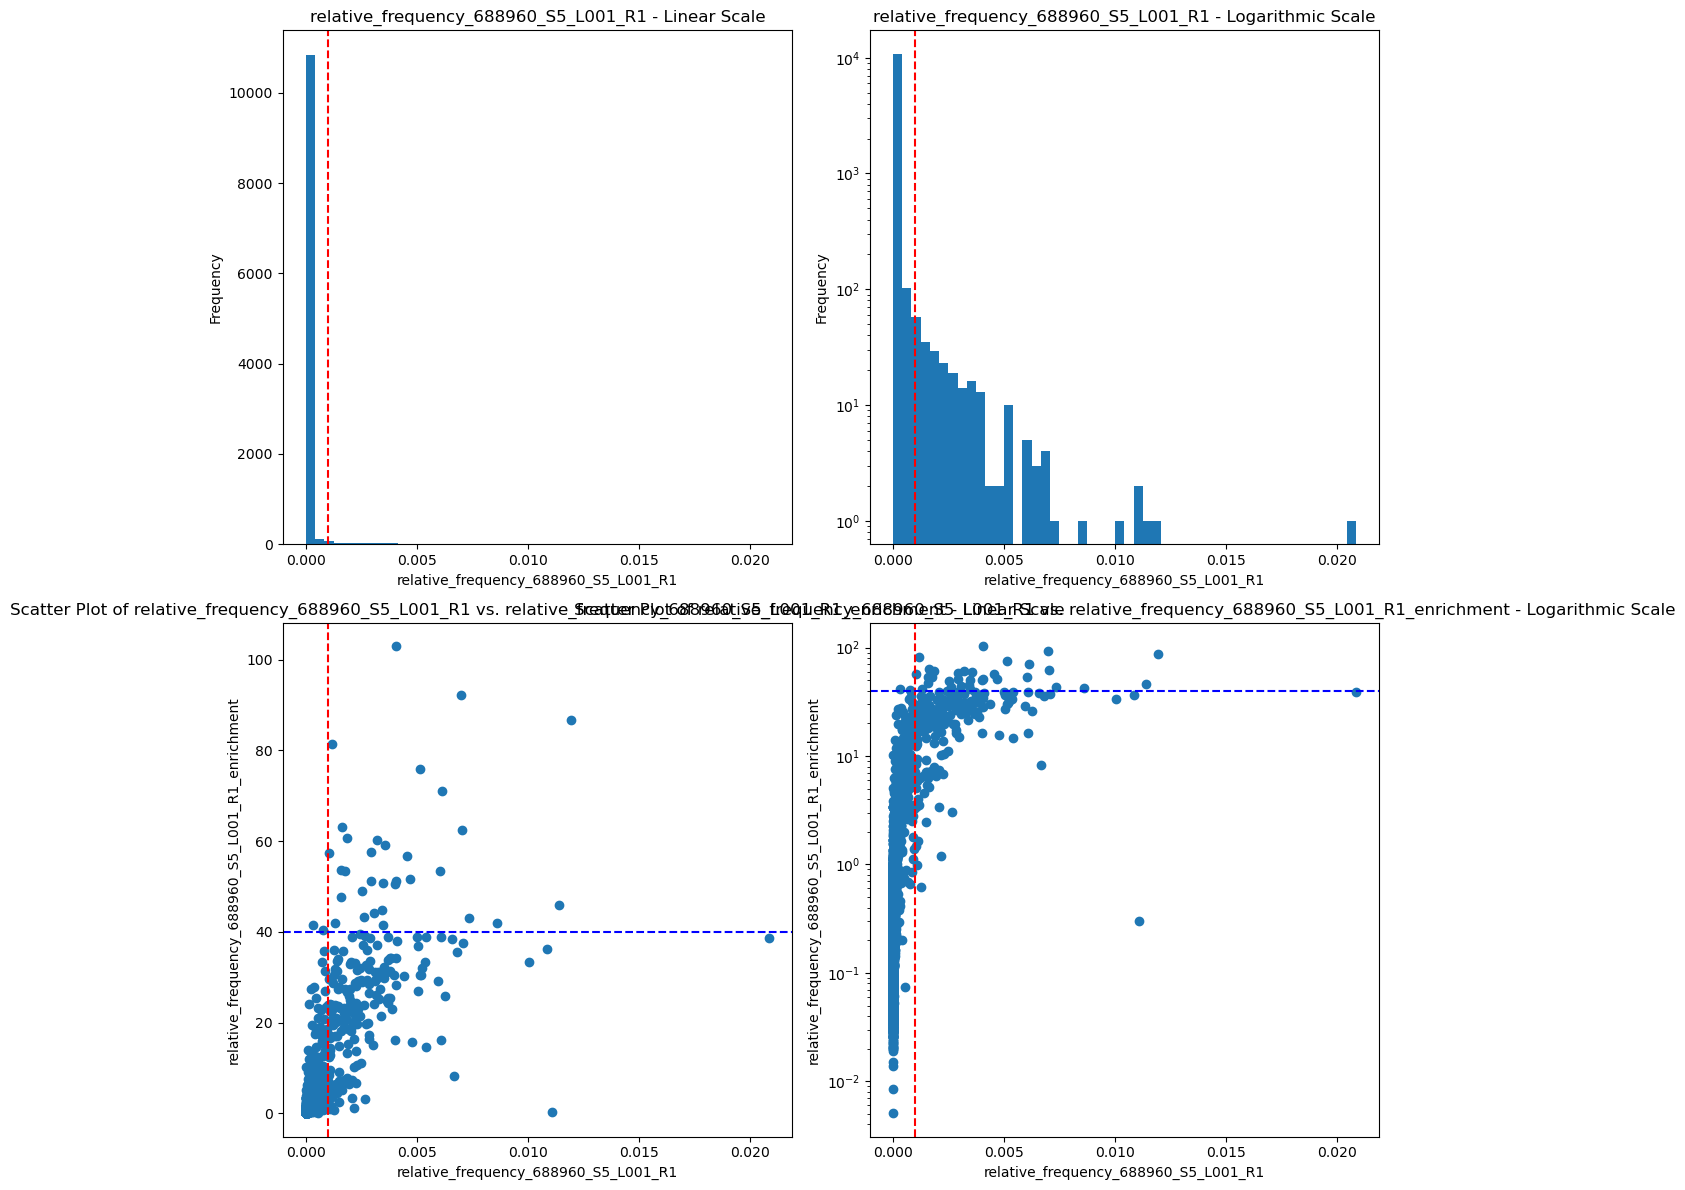

In [48]:
column = 'relative_frequency_688960_S5_L001_R1'
enriched_column = column + '_enrichment'

enrichment = True
# enrichment = False
cutoff_value = .001
enriched_cutoff_value = 40

# Store cutoff values
cutoff[column] = cutoff_value

# Determine the number of subplots based on the presence of the enriched column
if enriched_column in merged_df_refined.columns and enrichment:
    cutoff[enriched_column] = enriched_cutoff_value
    num_plots = 2
else:
    num_plots = 1

fig, axs = plt.subplots(num_plots, 2, figsize=(12, 6 * num_plots))

num_bins = 50

if num_plots == 1:
    axs = [axs]  # Ensure axs is a list of subplots for consistent indexing

# Plot for the original column (linear scale)
axs[0][0].hist(merged_df_refined[column], bins=num_bins)
axs[0][0].axvline(x=cutoff[column], color='red', linestyle='--')  # Add red line on x-axis
axs[0][0].set_title(f'{column} - Linear Scale')
axs[0][0].set_xlabel(column)
axs[0][0].set_ylabel('Frequency')

# Plot for the original column (logarithmic scale)
axs[0][1].hist(merged_df_refined[column], bins=num_bins)
axs[0][1].set_yscale('log')  # Set y-axis to logarithmic scale
axs[0][1].axvline(x=cutoff[column], color='red', linestyle='--')  # Add red line on x-axis
axs[0][1].set_title(f'{column} - Logarithmic Scale')
axs[0][1].set_xlabel(column)
axs[0][1].set_ylabel('Frequency')

if enriched_column in merged_df_refined.columns and enrichment:
    # Scatter plot for the original and enriched columns
    axs[1][0].scatter(merged_df_refined[column], merged_df_refined[enriched_column])
    axs[1][0].axvline(x=cutoff[column], color='red', linestyle='--')  # Add red line on x-axis for relative frequency
    axs[1][0].axhline(y=cutoff[enriched_column], color='blue', linestyle='--')  # Add blue line on y-axis for enrichment
    axs[1][0].set_title(f'Scatter Plot of {column} vs. {enriched_column} - Linear Scale')
    axs[1][0].set_xlabel(column)
    axs[1][0].set_ylabel(enriched_column)

    # Scatter plot for the original and enriched columns (logarithmic scale)
    axs[1][1].scatter(merged_df_refined[column], merged_df_refined[enriched_column])
    axs[1][1].set_yscale('log')  # Set y-axis to logarithmic scale
    axs[1][1].axvline(x=cutoff[column], color='red', linestyle='--')  # Add red line on x-axis for relative frequency
    axs[1][1].axhline(y=cutoff[enriched_column], color='blue', linestyle='--')  # Add blue line on y-axis for enrichment
    axs[1][1].set_title(f'Scatter Plot of {column} vs. {enriched_column} - Logarithmic Scale')
    axs[1][1].set_xlabel(column)
    axs[1][1].set_ylabel(enriched_column)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [39]:
cutoff

{'relative_frequency_672510_S4_L001_R1': 0.02}

In [49]:
# cutoff_df = pd.DataFrame([cutoff])
# cutoff_df.to_csv(path_to_fastq_qz_files + '/cutoff_df.csv')
cutoff_df = pd.read_csv(path_to_fastq_qz_files + '/cutoff_df.csv')

In [50]:
cutoff_df

,Unnamed: 0,relative_frequency_688960_S5_L001_R1,relative_frequency_688960_S5_L001_R1_enrichment,relative_frequency_688961_S6_L001_R1,relative_frequency_688961_S6_L001_R1_enrichment,relative_frequency_688962_S7_L001_R1,relative_frequency_688962_S7_L001_R1_enrichment,relative_frequency_688963_S8_L001_R1,relative_frequency_688963_S8_L001_R1_enrichment,relative_frequency_688964_S9_L001_R1,relative_frequency_688964_S9_L001_R1_enrichment,relative_frequency_688965_S10_L001_R1,relative_frequency_688965_S10_L001_R1_enrichment,relative_frequency_688966_S11_L001_R1,relative_frequency_688966_S11_L001_R1_enrichment,relative_frequency_688967_S12_L001_R1,relative_frequency_688967_S12_L001_R1_enrichment,relative_frequency_688968_S13_L001_R1,relative_frequency_688968_S13_L001_R1_enrichment,relative_frequency_688969_S14_L001_R1,relative_frequency_688969_S14_L001_R1_enrichment,relative_frequency_688970_S15_L001_R1,relative_frequency_688970_S15_L001_R1_enrichment,relative_frequency_688971_S16_L001_R1,relative_frequency_688971_S16_L001_R1_enrichment,relative_frequency_688972_S17_L001_R1,relative_frequency_688972_S17_L001_R1_enrichment,relative_frequency_688973_S18_L001_R1,relative_frequency_688973_S18_L001_R1_enrichment,relative_frequency_688974_S19_L001_R1,relative_frequency_688974_S19_L001_R1_enrichment,relative_frequency_688975_S20_L001_R1,relative_frequency_688975_S20_L001_R1_enrichment,relative_frequency_688976_S21_L001_R1,relative_frequency_690023_S20_L001_R1,relative_frequency_690023_S20_L001_R1_enrichment,relative_frequency_690024_S21_L001_R1,relative_frequency_690024_S21_L001_R1_enrichment,relative_frequency_690025_S22_L001_R1,relative_frequency_690025_S22_L001_R1_enrichment,relative_frequency_690026_S23_L001_R1,relative_frequency_690026_S23_L001_R1_enrichment,relative_frequency_690027_S24_L001_R1,relative_frequency_690027_S24_L001_R1_enrichment,relative_frequency_690028_S25_L001_R1,relative_frequency_690028_S25_L001_R1_enrichment,relative_frequency_690029_S26_L001_R1,relative_frequency_690029_S26_L001_R1_enrichment,relative_frequency_690030_S27_L001_R1,relative_frequency_690030_S27_L001_R1_enrichment,relative_frequency_690031_S28_L001_R1,relative_frequency_690031_S28_L001_R1_enrichment,relative_frequency_690032_S29_L001_R1,relative_frequency_690032_S29_L001_R1_enrichment,relative_frequency_690033_S30_L001_R1,relative_frequency_690033_S30_L001_R1_enrichment,relative_frequency_690034_S31_L001_R1,relative_frequency_690034_S31_L001_R1_enrichment,relative_frequency_690035_S32_L001_R1,relative_frequency_690035_S32_L001_R1_enrichment,relative_frequency_690036_S33_L001_R1,relative_frequency_690036_S33_L001_R1_enrichment,relative_frequency_690037_S34_L001_R1,relative_frequency_690037_S34_L001_R1_enrichment,relative_frequency_690038_S35_L001_R1,relative_frequency_690038_S35_L001_R1_enrichment,relative_frequency_690039_S36_L001_R1,relative_frequency_690039_S36_L001_R1_enrichment,relative_frequency_690040_S37_L001_R1,relative_frequency_690040_S37_L001_R1_enrichment,relative_frequency_690041_S38_L001_R1,relative_frequency_690041_S38_L001_R1_enrichment,relative_frequency_690042_S39_L001_R1,relative_frequency_690042_S39_L001_R1_enrichment
0,0,0.001,20,0.001,20,0.001,20,0.001,20,0.001,20,0.001,20,0.02,20,0.001,20,0.001,100,0.001,100,0.001,100,0.001,100,0.005,100,0.005,100,0.005,100,0.005,100,0.005,0.005,100,0.005,100,0.005,500,0.005,200,0.005,200,0.005,200,0.005,200,0.005,200,0.05,400,0.01,200,0.01,130,0.01,130,0.01,150,0.01,200,0.01,500,0.01,250,0.01,250,0.01,250,0.01,250,0.01,10


In [51]:
cutoff_df_binders = cutoff_df[['relative_frequency_688960_S5_L001_R1', 'relative_frequency_688961_S6_L001_R1', 'relative_frequency_688960_S5_L001_R1_enrichment', 'relative_frequency_688961_S6_L001_R1_enrichment']]
cutoff_df_nonspecific = cutoff_df[['relative_frequency_688966_S11_L001_R1', 'relative_frequency_688967_S12_L001_R1', 'relative_frequency_688966_S11_L001_R1_enrichment', 'relative_frequency_688967_S12_L001_R1_enrichment']]
cutoff_df_binders

,relative_frequency_688960_S5_L001_R1,relative_frequency_688961_S6_L001_R1,relative_frequency_688960_S5_L001_R1_enrichment,relative_frequency_688961_S6_L001_R1_enrichment
0,0.001,0.001,20,20


In [52]:
# Initialize the list to store samples exceeding the cutoff
binders = []

# Find column pairs and single columns
columns = cutoff_df_binders.columns.tolist()
paired_columns = {}

for column in columns:
    if column.endswith('_enrichment'):
        prefix = column[:-11]
        if prefix in columns:
            paired_columns[prefix] = column

# Iterate over paired columns
for prefix, enrichment_col in paired_columns.items():
    cutoff_value_prefix = cutoff_df_binders[prefix].iloc[0]
    cutoff_value_enrichment = cutoff_df_binders[enrichment_col].iloc[0]
    mask = (temp[prefix] > cutoff_value_prefix) & (temp[enrichment_col] > cutoff_value_enrichment)
    binders.extend(temp.loc[mask, 'name'].tolist())
    
binders = list(set(binders))

In [53]:
# Initialize the list to store samples exceeding the cutoff
non_specific = []

# Find column pairs and single columns
columns = cutoff_df_nonspecific.columns.tolist()
paired_columns = {}

for column in columns:
    if column.endswith('_enrichment'):
        prefix = column[:-11]
        if prefix in columns:
            paired_columns[prefix] = column

# Iterate over paired columns
for prefix, enrichment_col in paired_columns.items():
    cutoff_value_prefix = cutoff_df_nonspecific[prefix].iloc[0]
    cutoff_value_enrichment = cutoff_df_nonspecific[enrichment_col].iloc[0]
    mask = (temp[prefix] > cutoff_value_prefix) & (temp[enrichment_col] > cutoff_value_enrichment)
    non_specific.extend(temp.loc[mask, 'name'].tolist())
    
non_specific = list(set(non_specific))

In [54]:
from collections import Counter
import pandas as pd

# Initialize the lists to store samples exceeding the cutoff
binders = []
non_specific = []

# Initialize counters to track occurrences in binders and non-specific columns
binder_counter = Counter()
non_binder_counter = Counter()

# Process binder columns
columns = cutoff_df_binders.columns.tolist()
paired_columns_binders = {}

for column in columns:
    if column.endswith('_enrichment'):
        prefix = column[:-11]
        if prefix in columns:
            paired_columns_binders[prefix] = column

# Iterate over paired columns for binders
for prefix, enrichment_col in paired_columns_binders.items():
    cutoff_value_prefix = cutoff_df_binders[prefix].iloc[0]
    cutoff_value_enrichment = cutoff_df_binders[enrichment_col].iloc[0]
    mask = (temp[prefix] > cutoff_value_prefix) & (temp[enrichment_col] > cutoff_value_enrichment)
    binder_samples = temp.loc[mask, 'name'].tolist()
    binders.extend(binder_samples)
    
    # Update binder counter for each sample
    binder_counter.update(binder_samples)

binders = list(set(binders))

# Process non-specific columns
columns = cutoff_df_nonspecific.columns.tolist()
paired_columns_non_specific = {}

for column in columns:
    if column.endswith('_enrichment'):
        prefix = column[:-11]
        if prefix in columns:
            paired_columns_non_specific[prefix] = column

# Iterate over paired columns for non-specific
for prefix, enrichment_col in paired_columns_non_specific.items():
    cutoff_value_prefix = cutoff_df_nonspecific[prefix].iloc[0]
    cutoff_value_enrichment = cutoff_df_nonspecific[enrichment_col].iloc[0]
    mask = (temp[prefix] > cutoff_value_prefix) & (temp[enrichment_col] > cutoff_value_enrichment)
    non_specific_samples = temp.loc[mask, 'name'].tolist()
    non_specific.extend(non_specific_samples)
    
    # Update non-binder counter for each sample
    non_binder_counter.update(non_specific_samples)

non_specific = list(set(non_specific))

# Get the unique set of samples from both binders and non-specific categories
all_samples = list(set(binders + non_specific))

# Create a new DataFrame to store the results
new_df = pd.DataFrame({
    'name': all_samples,
    'binder_count': [binder_counter[sample] for sample in all_samples],
    'non_binder_count': [non_binder_counter[sample] for sample in all_samples]
})

# Filter temp DataFrame to keep only rows matching samples in binders or non-specific
filtered_temp_df = temp[temp['name'].isin(all_samples)]

# Merge the count DataFrame with the filtered temp DataFrame
final_df = filtered_temp_df.merge(new_df, on='name', how='left')
final_df['ratio'] = final_df['binder_count'] / final_df['non_binder_count']
# Replace only positive infinity values with 100
final_df.replace(float('inf'), 100, inplace=True)

final_df

,name,relative_frequency_688956_S1_L001_R1,relative_frequency_688957_S2_L001_R1,relative_frequency_688958_S3_L001_R1,relative_frequency_688959_S4_L001_R1,relative_frequency_688960_S5_L001_R1,relative_frequency_688961_S6_L001_R1,relative_frequency_688962_S7_L001_R1,relative_frequency_688963_S8_L001_R1,relative_frequency_688964_S9_L001_R1,relative_frequency_688965_S10_L001_R1,relative_frequency_688966_S11_L001_R1,relative_frequency_688967_S12_L001_R1,relative_frequency_688968_S13_L001_R1,relative_frequency_688969_S14_L001_R1,relative_frequency_688970_S15_L001_R1,relative_frequency_688971_S16_L001_R1,relative_frequency_688972_S17_L001_R1,relative_frequency_688973_S18_L001_R1,relative_frequency_688974_S19_L001_R1,relative_frequency_688975_S20_L001_R1,relative_frequency_688957_S2_L001_R1_enrichment,relative_frequency_688960_S5_L001_R1_enrichment,relative_frequency_688961_S6_L001_R1_enrichment,relative_frequency_688966_S11_L001_R1_enrichment,relative_frequency_688967_S12_L001_R1_enrichment,binder_count,non_binder_count,ratio
0,bxscaf2_2x4o_model0_iscafv1_10_dldesign_0_dldesign_0_25_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,0.000070,0.000056,0.000121,0.000072,0.000200,0.001248,0.000168,0.001533,0.000064,0.001425,0.000017,0.000026,0.000022,0.000033,0.000036,0.000054,0.000079,0.000071,0.000073,0.000080,0.799257,3.567635,22.224279,0.306018,0.456243,1,0,100.0
1,bxscaf2_2x4o_model0_iscafv1_10_dldesign_2_dldesign_0_8_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,0.000061,0.000060,0.000039,0.000079,0.000365,0.001297,0.000295,0.000462,0.000098,0.003423,0.000023,0.000039,0.000023,0.000025,0.000043,0.000096,0.000151,0.004204,0.000196,0.002696,0.969666,6.122604,21.781203,0.379139,0.653736,1,0,100.0
2,bxscaf2_2x4o_model3_iscafv1_46_dldesign_2_dldesign_0_11_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,0.000066,0.000070,0.000069,0.000059,0.000244,0.001432,0.000171,0.000572,0.000057,0.001346,0.000013,0.000052,0.000016,0.000028,0.000040,0.000069,0.000050,0.000104,0.000076,0.000085,1.050600,3.495049,20.514453,0.189883,0.748636,1,0,100.0
3,bxscaf2_2x4o_model3_iscafv1_46_dldesign_2_dldesign_0_17_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,0.000095,0.000103,0.000138,0.000127,0.002355,0.001089,0.002521,0.001454,0.001806,0.000897,0.000037,0.000031,0.000029,0.000027,0.000069,0.000105,0.000167,0.000175,0.000151,0.000176,1.078371,22.905908,10.590495,0.358123,0.298999,1,0,100.0
4,bxscaf2_2x4o_model3_iscafv1_46_dldesign_2_dldesign_0_23_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,0.000062,0.000047,0.000063,0.000064,0.001682,0.000433,0.002064,0.000738,0.003779,0.000449,0.000041,0.000011,0.000016,0.000017,0.000025,0.000058,0.000104,0.000108,0.000096,0.000174,0.755214,35.757495,9.209851,0.876593,0.239601,1,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,shortscaf93_2x4o_model0_iscafv1_3_dldesign_1_dldesign_0_4_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_iscafv2_6_dldesign_0_14_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,0.000076,0.000152,0.000083,0.000077,0.000339,0.001487,0.000331,0.002510,0.000296,0.001329,0.000666,0.112812,0.000683,0.000337,0.000074,0.000093,0.000147,0.003623,0.000291,0.007925,1.993685,2.228317,9.770441,4.379012,741.470948,0,1,0.0
250,shortscaf96_2x4o_model3_iscafv1_44_dldesign_1_dldesign_0_24_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_iscafv2_12_dldesign_0_9_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,0.000076,0.000060,0.000031,0.000044,0.000222,0.001246,0.000163,0.001115,0.000098,0.000799,0.000016,0.000044,0.000030,0.000031,0.000031,0.000058,0.000088,0.002127,0.000195,0.004473,0.789120,3.706009,20.777072,0.262080,0.735072,1,0,100.0
251,shortscaf97_2x4o_model0_iscafv1_42_dldesign_1_dldesign_0_15_af2pred_A0201_KLTPLCVTL_unrelaxed_model_1_dna_seq1,0.000111,0.000111,0.000127,0.000138,0.000673,0.003660,0.000542,0.005340,0.000232,0.003152,0.000037,0.000121,0.000037,0.000052,0.000082,0.000088,0.000169,0.000578,0.000276,0.0